In [63]:
import numpy as np

# Read A and B from text files

A = np.loadtxt('Kmat.txt')  # Each element in a new line
B = np.loadtxt('Fvec.txt')  # Each element in a new line


In [64]:
B

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.281732, 0.54064 ,
       0.755749, 0.909632, 0.989821, 0.989821, 0.909632, 0.755749,
       0.54064 , 0.281733, 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.   

In [65]:
A.size

26569

In [66]:
B.size

163

In [67]:
A = A.reshape((A.size//B.size, B.size))      # Reshape A to n x n matrix

B = B.reshape((-1, 1))     # Make B a column vector


In [68]:
eigenvalues = np.linalg.eigvals(A)
# print(max(eigenvalues))
spectral_radius = max(abs(eigenvalues))
print(spectral_radius)

4.484879448330329


In [69]:
A.shape

(163, 163)

In [70]:
D = np.diag(np.diag(A))
F = -(np.triu(A) - D)
E = -(np.tril(A) - D)

In [71]:
dum = D - E - F

In [72]:
dum

array([[ 1.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  1.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  1.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  2.70054 ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  2.687408,
        -0.334753],
       [ 0.      ,  0.      ,  0.      , ...,  0.      , -0.334753,
         2.677458]], shape=(163, 163))

In [73]:
x = np.array([0.0]*B.size).reshape((-1, 1))  # Initial guess (column vector)

In [74]:
# Jacobi Method
def jacobi(A, B, x, D, max_iterations=1000, tolerance=1e-50):
    # N = E + F
    M = D
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (Jacobi):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (Jacobi):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Jacobi method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [75]:
jacobi_solution = jacobi(A, B, x, D)
print("Jacobi Solution:\n", jacobi_solution.T)

Spectral Radius (Jacobi): 0.9551658875648124
Convergence rate (Jacobi): 0.01992119616750029
Jacobi method converged in 782 iterations.
Jacobi Solution:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.281732   0.54064
  0.755749   0.909632   0.989821   0.989821   0.909632   0.755749
  0.54064    0.281733   0.19386554 0.06583863 0.3100378  0.0758093
  0.31066596 0.12010047 0.06419077 0.49024231 0.1245252  0.02760138
  0.29482816 0.02899316 0.30264319 0.13569459 0.27447364 0.12345943
  0.23461891 0.04214645 0.57508166 0.05831765 0.05969427 0.16684503
  0.03994833 0.5328507  0.16381365 0.10009762 0.20517154 0.33392146
  0.12176695 0.02925004 0.71276474 0.07637987 0.06497999 0.01790465
  0.57516

In [76]:
# Gauss-Seidel Method
def gauss_seidel(A, B, x, D, E, max_iterations=1000, tolerance=1e-50):
    # N = E + F
    M = D - E
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (Gauss-Seidel):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (Gauss-Seidel):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Gauss-Seidel method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [77]:
gs_solution = gauss_seidel(A, B, x, D, E)
print("Gauss-Seidel Solution:\n", gs_solution.T)

Spectral Radius (Gauss-Seidel): 0.9127563485072119
Convergence rate (Gauss-Seidel): 0.03964513771314365
Gauss-Seidel method converged in 408 iterations.
Gauss-Seidel Solution:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.281732   0.54064
  0.755749   0.909632   0.989821   0.989821   0.909632   0.755749
  0.54064    0.281733   0.19386554 0.06583863 0.3100378  0.0758093
  0.31066596 0.12010047 0.06419077 0.49024231 0.1245252  0.02760138
  0.29482816 0.02899316 0.30264319 0.13569459 0.27447364 0.12345943
  0.23461891 0.04214645 0.57508166 0.05831765 0.05969427 0.16684503
  0.03994833 0.5328507  0.16381365 0.10009762 0.20517154 0.33392146
  0.12176695 0.02925004 0.71276474 0.07637987 0.06497

In [78]:
np.linalg.norm(A @ gs_solution - B)  # Check if Ax = B

np.float64(8.959357099236678e-16)

In [79]:
np.linalg.norm(A @ jacobi_solution - B)  # Check if Ax = B

np.float64(1.1424513686557992e-15)

In [89]:
def SOR(A, B, x, D, E, omega=1.25, max_iterations=1000, tolerance=1e-50):
    M = (1/omega)*D - E
    G = np.linalg.inv(M) @ (M - A)
    f = np.linalg.inv(M) @ B

    print("Spectral Radius (SOR):", max(abs(np.linalg.eigvals(G))))
    print("Convergence rate (SOR):", -np.log10(max(abs(np.linalg.eigvals(G)))))
    for iteration in range(max_iterations):
        x_new = G @ x + f
        # Check for convergence
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"SOR method converged in {iteration} iterations.")
            return x_new
        x = x_new

In [86]:
# sor_solution = SOR(A, B, x, D, E,omega=1.9)
# print("SOR Solution:\n", sor_solution.T)

In [82]:
w = [1.1,1.3,1.6,1.9]

In [83]:
for i in w:
    print(f"Omega: {i}")
    sor_solution = SOR(A, B, x, D, E,omega=i)
    # print("SOR Solution:\n", sor_solution.T)
    print("\n")

Omega: 1.1


Spectral Radius (SOR): 0.8935049625613205
Convergence rate (SOR): 0.04890303106319144


Omega: 1.3
Spectral Radius (SOR): 0.8369930459979615
Convergence rate (SOR): 0.077278150247192


Omega: 1.6
Spectral Radius (SOR): 0.6308685033297887
Convergence rate (SOR): 0.2000611545904173


Omega: 1.9
Spectral Radius (SOR): 0.9085456085778375
Convergence rate (SOR): 0.04165326642253043




In [84]:
#plotting omega vs convergence rate
omega_values = []
convergence_rates = []
w = np.arange(1.0, 2.0, 0.02)
for i in w:
    M = (1/i)*D - E
    G = np.linalg.inv(M) @ (M - A)
    rho = max(abs(np.linalg.eigvals(G)))
    omega_values.append(i)
    convergence_rates.append(-np.log10(rho))


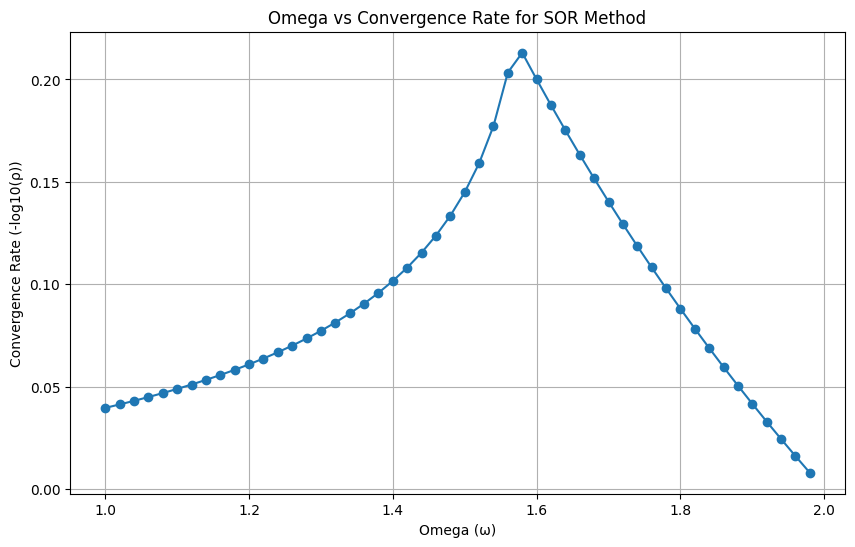

<Figure size 640x480 with 0 Axes>

In [85]:
import matplotlib.pyplot as plt
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.plot(omega_values, convergence_rates, marker='o')
plt.title('Omega vs Convergence Rate for SOR Method')
plt.xlabel('Omega (ω)')
plt.ylabel('Convergence Rate (-log10(ρ))')
plt.grid()
plt.show()
plt.savefig('omega_vs_convergence_rate.png')